# Data Science challenge part 2

   In 2 pages or less develop a plan to classify the descriptions, and automatically
   determine which part has been replaced.  Be specific, and explain in terms which can
   be understood by someone who is not a specialist in natual language processing.
   
   Estimate the accuracy of your proposed model.
   State which libraries you might use and what might have to be written from scratch.
   
   Explain how you would validate the model on a larger data set.

#### Plan


The plan to classify the descriptions has 3 parts.
 
 First: Import all the text data and do the preprocessing.
        The preprocessing includes: 
            - Transforming all the letters to lower case, 
            - Remove non-descriptive words such as articles and prepositions (a, the, and...) 
            - Remove the verbal time from the words. ie: inspected -> inspect
        For this part, the library "nltk" will be used. 
        This step of "cleaning" the text is necessary because to create the model, it will consider the words of the
        description to determine the output (part name). Therefore, only meaningfull words will be considered. 
        The algorithm takes in consideration every word from every data entry to create a sparcity matrix to analysis the trend
        based on the incidence of each word in each data entry and associate it with the target variable.
        
 Second: Create the "bag of words".
         After cleaning the data, we create the bag of words, which is the sparcity matrix mentioned before.
         This matrix will be the data necessary to train the model.
         This is a simple step and the library sklearn.feature_extraction.text will be used to accomplish that.
        
 Third: Create the machine learning model, make the prediction, and the estimate the accuracy. 
        A popular model for natural language processing is the Naive Bayes. I will be using this model from the 
        sklearn library to create my model. 
        The data will be separated in train and test. This way, it will be possible to evaluate the model.
        The sklearn.metrics will give us the ability to use the confusion_matrix for evaluation. 
       
 To validate this model for a large dataset, the same steps would be taken. However, with more data, the model will be able 
 to better analyze the trend and be more accurate. With such a small dataset, the model achieved an accuracy of 70%.


### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Import the dataset

In [2]:
starter_actions = pd.read_csv('starter_actions.csv')
alternator_actions = pd.read_csv('alternator_actions.csv')

### Pre-processing

In [3]:
starter_actions.head()

,correction_description,"""part_name"""
0,inspected vehicle for clicking and no start co...,"""STARTER"""
1,CHECK FOR NO START JUST CLICK CHECKED FOR A NO...,"""STARTER"""
2,INSPECT NO START CHECK CODES-P127A STARTER CON...,"""STARTER"""
3,CHECK NO START OK NOW REMOVE CONNECTIONS OF...,"""STARTER"""
4,7 way connector wiring has melted on exhaust r...,"""STARTER"""


In [4]:
starter_actions.drop(columns = [' "part_name"'], inplace = True)
starter_actions['part_name'] = np.ones(starter_actions.shape[0])
starter_actions.head()

,correction_description,part_name
0,inspected vehicle for clicking and no start co...,1.0
1,CHECK FOR NO START JUST CLICK CHECKED FOR A NO...,1.0
2,INSPECT NO START CHECK CODES-P127A STARTER CON...,1.0
3,CHECK NO START OK NOW REMOVE CONNECTIONS OF...,1.0
4,7 way connector wiring has melted on exhaust r...,1.0


In [5]:
alternator_actions.head()

,correction_description,"""part_name"""
0,CHECK NO START CHARGE BATT ALT NOT CHARGING ...,"""ALTERNATOR"""
1,check mil light p3119 stored road test light...,"""ALTERNATOR"""
2,check mil light p3119 stored road test light...,"""ALTERNATOR"""
3,TEST BATTERY AND CHARGED TESTED ALTERNATOR NEE...,"""ALTERNATOR"""
4,DIAGNOSIS FOR NO START. SCAN FOR CODE U0100 LO...,"""ALTERNATOR"""


In [6]:
alternator_actions.drop(columns = [' "part_name"'], inplace = True)
alternator_actions['part_name'] = np.zeros(alternator_actions.shape[0])
alternator_actions.head()

,correction_description,part_name
0,CHECK NO START CHARGE BATT ALT NOT CHARGING ...,0.0
1,check mil light p3119 stored road test light...,0.0
2,check mil light p3119 stored road test light...,0.0
3,TEST BATTERY AND CHARGED TESTED ALTERNATOR NEE...,0.0
4,DIAGNOSIS FOR NO START. SCAN FOR CODE U0100 LO...,0.0


In [7]:
dataframe = pd.concat([starter_actions, alternator_actions], axis = 0, sort = False)
dataframe = dataframe.reset_index(drop = True)
dataframe.head()

,correction_description,part_name
0,inspected vehicle for clicking and no start co...,1.0
1,CHECK FOR NO START JUST CLICK CHECKED FOR A NO...,1.0
2,INSPECT NO START CHECK CODES-P127A STARTER CON...,1.0
3,CHECK NO START OK NOW REMOVE CONNECTIONS OF...,1.0
4,7 way connector wiring has melted on exhaust r...,1.0


### lower case all the letters

In [8]:
for i in range(0, dataframe.shape[0]):
    dataframe['correction_description'][i] = dataframe['correction_description'][i].lower()

In [9]:
dataframe.head()

,correction_description,part_name
0,inspected vehicle for clicking and no start co...,1.0
1,check for no start just click checked for a no...,1.0
2,inspect no start check codes-p127a starter con...,1.0
3,check no start ok now remove connections of...,1.0
4,7 way connector wiring has melted on exhaust r...,1.0


### Create a vector of words to iterate

In [10]:
for i in range(0, dataframe.shape[0]):
    dataframe['correction_description'][i] = dataframe['correction_description'][i].split()

In [11]:
dataframe.head()

,correction_description,part_name
0,"[inspected, vehicle, for, clicking, and, no, s...",1.0
1,"[check, for, no, start, just, click, checked, ...",1.0
2,"[inspect, no, start, check, codes-p127a, start...",1.0
3,"[check, no, start, ok, now, remove, connection...",1.0
4,"[7, way, connector, wiring, has, melted, on, e...",1.0


### Remove unnecessary words like prepositions 

In [12]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brenn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
for i in range(0, dataframe.shape[0]):
    dataframe['correction_description'][i] = [word for word in dataframe['correction_description'][i] if not word in stopwords.words('english')]

In [14]:
dataframe.head()

,correction_description,part_name
0,"[inspected, vehicle, clicking, start, confirme...",1.0
1,"[check, start, click, checked, start, started,...",1.0
2,"[inspect, start, check, codes-p127a, starter, ...",1.0
3,"[check, start, ok, remove, connections, starte...",1.0
4,"[7, way, connector, wiring, melted, exhaust, r...",1.0


### Remove verbal time from the words, for example inspected will become inspect

In [15]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
for i in range(0, dataframe.shape[0]):
    dataframe['correction_description'][i] = [ps.stem(word) for word in dataframe['correction_description'][i] if not word in stopwords.words('english')]

In [16]:
dataframe.head()

,correction_description,part_name
0,"[inspect, vehicl, click, start, confirm, custo...",1.0
1,"[check, start, click, check, start, start, ok,...",1.0
2,"[inspect, start, check, codes-p127a, starter, ...",1.0
3,"[check, start, ok, remov, connect, starter, &,...",1.0
4,"[7, way, connector, wire, melt, exhaust, requi...",1.0


### Not necessary to iterate anymore, transforming it back to string

In [17]:
for i in range(0, dataframe.shape[0]):
    dataframe['correction_description'][i] = ' '.join(dataframe['correction_description'][i])

In [19]:
dataframe.head()

,correction_description,part_name
0,inspect vehicl click start confirm custom comp...,1.0
1,check start click check start start ok tri los...,1.0
2,inspect start check codes-p127a starter contro...,1.0
3,check start ok remov connect starter & check o...,1.0
4,7 way connector wire melt exhaust requir wirin...,1.0


## Creating the bag of words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(dataframe['correction_description'])
y = dataframe['part_name']

In [34]:
X.shape # 49 lines, 313 different words 

(49, 313)

In [35]:
y.shape

(49,)

### We are ready to create the machine learning model

In [39]:
# Splitting the data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

### Naive Bayes is one of the most popular models for natural language processing

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_test = y_test.to_numpy()

GaussianNB(priors=None, var_smoothing=1e-09)

## The model predicted correctly: 1 true negative and 6 true positives.
## The model predicted incorrectly: 3 false negatives. 

In [93]:
incorrect = 0
print("\n")
for i in range(0, 10):
    print("Correct: ", end = '')
    if(y_test[i] == 1):
        print("Starter", end = '')
    else:
        print("Alternator", end = '')
    print("\t Predicted: ", end = '')
    if(y_pred[i] == 1):
        print("Started", end = '')
    else:
        print("Alternator", end = '')
    if(y_test[i] == y_pred[i]):
        print("\t Correct prediction.")
    else:
        print("\t Incorrect prediction")
        incorrect = incorrect + 1
        
print("\nAccuracy %.2f%%" %(100 - (float)(100*incorrect/y_pred.size)))



Correct: Starter	 Predicted: Alternator	 Incorrect prediction
Correct: Starter	 Predicted: Alternator	 Incorrect prediction
Correct: Starter	 Predicted: Started	 Correct prediction.
Correct: Starter	 Predicted: Started	 Correct prediction.
Correct: Starter	 Predicted: Started	 Correct prediction.
Correct: Starter	 Predicted: Started	 Correct prediction.
Correct: Starter	 Predicted: Alternator	 Incorrect prediction
Correct: Alternator	 Predicted: Alternator	 Correct prediction.
Correct: Starter	 Predicted: Started	 Correct prediction.
Correct: Starter	 Predicted: Started	 Correct prediction.

Accuracy 70.00%


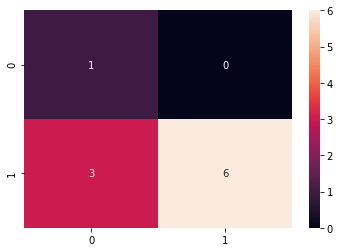

In [47]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

## For a better accuracy, more data would be necessary to better train the model